In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
data = pd.read_csv(url)

In [3]:
# Data exploration

print(data.head())
print(data.info())
print(data.describe())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [4]:
# Check for missing values

print(data.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [5]:
# Feature engineering


# Convert type to categorical and one-hot encode

data['Type'] = data['Type'].astype('category')
data = pd.get_dummies(data, columns=['Type'])

# Drop unnecessary columns

data = data.drop(['UDI', 'Product ID'], axis=1)

# Check class distribution (failure vs non-failure)

print(data['Machine failure'].value_counts())

Machine failure
0    9661
1     339
Name: count, dtype: int64


In [6]:
# Handle class imbalance (we'll use class weights)

class_weights = {0: 1, 1: 10}  # Higher weight for failure class


# Prepare features and target

X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

In [7]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train Random Forest classifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [11]:
# Make predictions

y_pred = rf_model.predict(X_test_scaled)

In [12]:
# Evaluate model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9993333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.98      0.99       102

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:
 [[2898    0]
 [   2  100]]


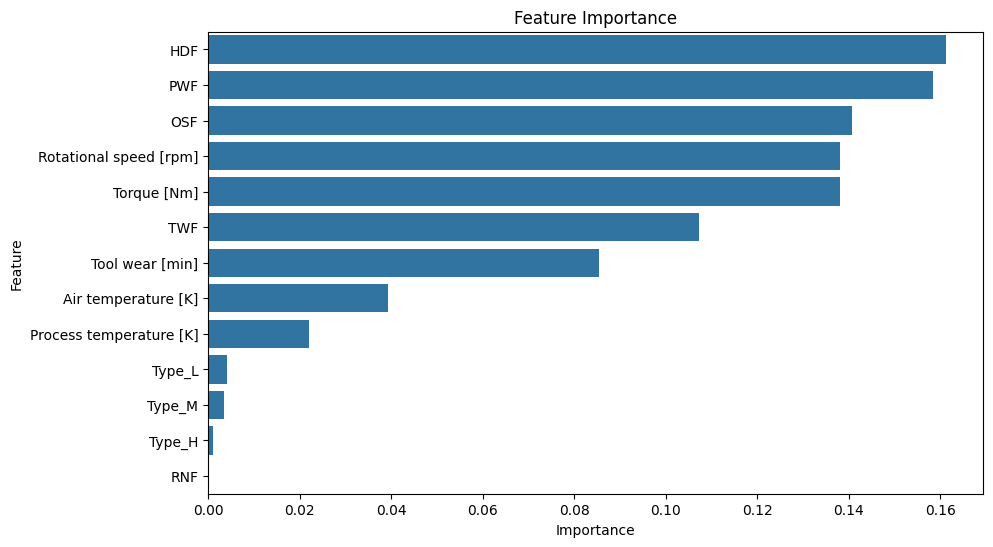

In [13]:
# Plot feature importance

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()